\begin{tabular}{rrrrr}
\toprule
Blob Size (Bytes) & C++ Avg. Latency (ns) & Python Avg. Latency (ns) & C++ Throughput (Gbps) & Python Throughput (Gbps) \\
\midrule
100 & 36.1 & 1,405.2 & 22.1 & 0.6 \\
500 & 133.3 & 4,091.3 & 30.0 & 1.0 \\
1,000 & 162.6 & 715.3 & 49.2 & 11.2 \\
5,000 & 884.3 & 1,792.7 & 45.2 & 22.3 \\
10,000 & 1,568.9 & 3,814.9 & 51.0 & 21.0 \\
50,000 & 5,809.0 & 42,889.8 & 68.9 & 9.3 \\
\bottomrule
\end{tabular}



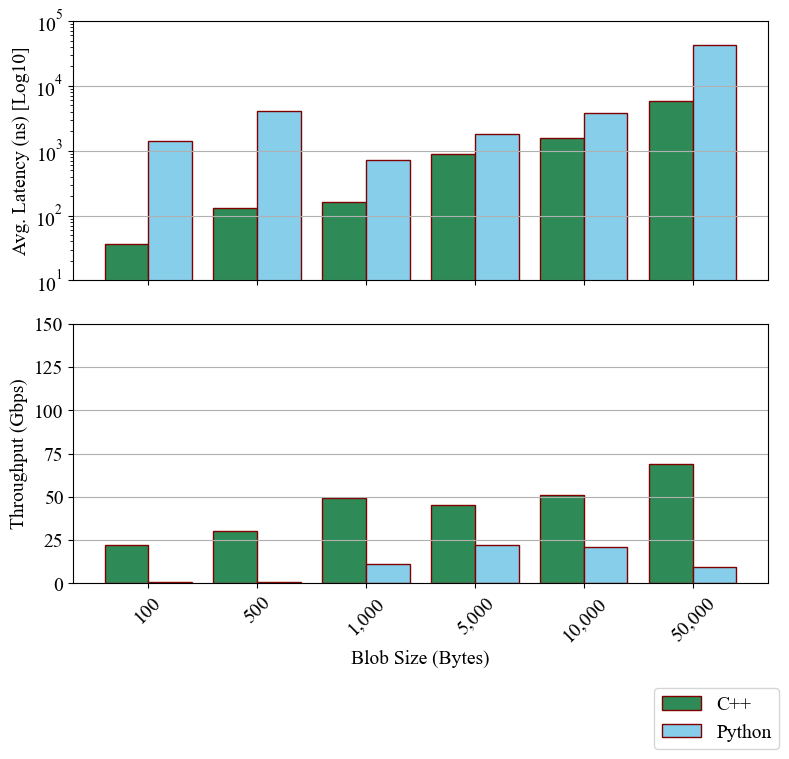

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "Times New Roman"

G = 1000000000
M = G / 1000

def update_df(df):
    df['avg_latency'] = df['Time'] / df['Entries']
    df['Gb'] = df['Size']*8*df['Entries']/G
    df['Gbps'] = df['Gb'] / (df['Time']/G)
    

cpp_df = pd.read_csv("../test-results/write_test.csv")
py_df = pd.read_csv("../test-results/py_write_test.csv")
update_df(cpp_df)
update_df(py_df)

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,7))


labels = ['{:,}'.format(value) for value in cpp_df['Size']]
x = np.arange(len(labels))
g1 = ax[0]
g1.bar(x - 0.2, list(cpp_df['avg_latency'].values), color ='seagreen', width = 0.4, label='C++', edgecolor='maroon')
g1.bar(x + 0.2, list(py_df['avg_latency'].values), color ='skyblue', width = 0.4, label='Python', edgecolor='maroon')
g1.set_yscale('log')
g1.set_ylabel('Avg. Latency (ns) [Log10]')
g1.set_ylim([10, 10**5])
g1.grid(axis='y')
g1.set_xticks(x)
g1.set_xticklabels(labels, rotation=45)

g0 = ax[1]

g0.bar(x - 0.2, list(cpp_df['Gbps'].values), color ='seagreen', width = 0.4, label='C++', edgecolor='maroon')
g0.bar(x + 0.2, list(py_df['Gbps'].values), color ='skyblue', width = 0.4, label='Python', edgecolor='maroon')
g0.set_ylabel("Throughput (Gbps)")
g0.set_ylim([0, 150])

g0.set_xticks(x)
g0.set_xticklabels(labels, rotation=45)
g0.set_xlabel('Blob Size (Bytes)')
g0.set_xticklabels(labels, rotation=45)

handles, labs = g0.get_legend_handles_labels()
fig.legend(handles, labs, loc='lower right', bbox_to_anchor=(1,-0.1))

g0.grid(axis='y')
fig.tight_layout()
fig.savefig("../test-results/write_test.png", dpi=300, bbox_inches='tight')


columns = ['Size', 'avg_latency', 'Gbps']
cpp_df = cpp_df[columns]
py_df = py_df[columns]
py_df.rename(columns={'avg_latency': 'py_avg_latency', 'Gbps': 'py_Gbps'}, inplace=True)


py_df.set_index(['Size'], inplace=True)
cpp_df.set_index(['Size'], inplace=True)
out_df = cpp_df.join(py_df).reset_index()
out_df = out_df[["Size", "avg_latency", "py_avg_latency", "Gbps", "py_Gbps"]]
out_df.rename(columns={"Size": "Blob Size (Bytes)", "avg_latency": "C++ Avg. Latency (ns)",
                      "py_avg_latency": "Python Avg. Latency (ns)", 
                      "Gbps": "C++ Throughput (Gbps)", "py_Gbps": "Python Throughput (Gbps)"}, inplace=True)
print(out_df.to_latex(index=False, float_format="{:,.1f}".format, formatters={"Blob Size (Bytes)": "{:,}".format}))